In [2003]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
np.random.seed(123)
import pandas as pd
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure

import pandas as pd
import numpy as np


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eddy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Funciones de ayuda, para presentar los resultados de los modelos

In [2004]:
def multiclass_to_class(predictions):
    p = []
    for i in predictions:
        try:
          li = i.tolist()
        except:
            li = i
        p.append(li.index(max(li)))
    return p
def plot_confusion_matrix(True_Label, Predicted_Label, Labels):
    cm = confusion_matrix(True_Label, Predicted_Label)
    #seaborn.set(color_codes=True)
    df_cm = pd.DataFrame(cm, index = [i for i in Labels], columns = [i for i in Labels])
    plt.figure(figsize = (10,7))
    plt.title("Confusion Matrix")
    sn.set(font_scale=1.4) 
    ax =  sn.heatmap(cm, annot=True, cmap="YlGnBu", annot_kws={"size": 16}, fmt='g')
    ax.set_xticklabels(Labels)
    ax.set_yticklabels(Labels)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
def multiclass_Model_Summary(True_Label, Predicted_Label, Labels):
    plot_confusion_matrix(True_Label, Predicted_Label, Labels)
    print(classification_report(True_Label, Predicted_Label, target_names=Labels))
def plot_importance(importance, feature_names, nfeatures=60):
    nf = nfeatures
    data = {'importance':importance}   
    dfimportance = pd.DataFrame(data)  
    dfimportance['feature'] = feature_names
    dfimportance['abs_importance'] = np.abs(dfimportance['importance'])
    dfimportance = dfimportance.sort_values(by='abs_importance', ascending=False)
    if len(dfimportance)<nfeatures:
        nf = len(dfimportance)
    topfeatures = dfimportance.iloc[0:nf,:]
    figure(figsize=(80, 60), dpi=80)
    pyplot.xticks(rotation=90)
    pyplot.tick_params(axis='x', labelsize=64)
    pyplot.bar( topfeatures['feature'], topfeatures['importance'])
    pyplot.show()
    print(topfeatures.to_string())
    return topfeatures

## Lectura e imputación de datos

Leer datos y verlos

In [2005]:
df = pd.read_csv('diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Se calcula el porcentaje de datos perdidos por columna, los que tengan un porcetage alto seran eliminados, en la documentación dice que los datos null se representaron con ?

In [2006]:
for col in df:
    nmiss = len(df[col][df[col] == '?'])
    if nmiss>0:
        print(col,nmiss,100*(nmiss/df.shape[0]))

race 2273 2.2335554114340743
weight 98569 96.85847925633315
payer_code 40256 39.5574160328597
medical_specialty 49949 49.08220820313268
diag_1 21 0.02063557573256294
diag_2 358 0.3517874339170253
diag_3 1423 1.398305917497003


Eliminar columnas que tengan muchos valores vacios, con porcetage mayor a 20%

In [2007]:
del df['weight']
del df['payer_code']
del df['medical_specialty']

LA columna AGE, es ordinal, asi que se castea a int.

In [2008]:
df['age'].value_counts()  

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [2009]:
df.loc[df['age']== '[0-10)','age'] = 0;
df.loc[df['age']== '[10-20)','age'] = 1;
df.loc[df['age']== '[20-30)','age'] = 2;
df.loc[df['age']== '[30-40)','age'] = 3;
df.loc[df['age']== '[40-50)','age'] = 4;
df.loc[df['age']== '[50-60)','age'] = 5;
df.loc[df['age']== '[60-70)','age'] = 6;
df.loc[df['age']== '[70-80)','age'] = 7;
df.loc[df['age']== '[80-90)','age'] = 8;
df.loc[df['age']== '[90-100)','age'] = 9;
df['age'] = df['age'].astype(np.int32)

Los otros son pocos datos asi que se decide a eliminarlos

In [2010]:
df = df[df.race != '?']
df = df[df.diag_1  != '?']
df = df[df.diag_2  != '?']
df = df[df.diag_3   != '?']

Se podrian tener rows repetidos, asi que se calcula cuntos se tienen, como en este caso no existe, no se hace nada mas.


In [2011]:
len(df)-len(df.drop_duplicates())

0

Si existe un null tirar ese row

In [2012]:
df.dropna(inplace = True)

patient_nbr es el indentificador para cliente asi que elimnar repetidas

In [2013]:
#df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)

Eliminar otros valores null los cuales se capturaron con 'Unknown/Invalid'

In [2014]:
for col in df:
    df = df[df[col]!='Unknown/Invalid']

## Exploración de los datos

se exploran los datos para ver como se comportan, como es la distribución o cuantas categorias existen por columna.

Se codifica a 0,1

In [2015]:
df['gender'].value_counts()  

Female    52833
Male      45219
Name: gender, dtype: int64

In [2016]:
le = preprocessing.LabelEncoder()
le.fit(df['gender'])
df['gender'] = le.transform(df['gender'])
df['gender'].value_counts() 

0    52833
1    45219
Name: gender, dtype: int64

Al revisar la documentacion vemos que algunas categorias son similares por lo que se podriana re agrupar
admission_type_id	description y asi reducir el numero de features.
1.   Emergency
2.   Urgent
3.   Elective
4.   Newborn
5.   Not Available
6.   NULL
7.   Trauma Center
8.   Not Mapped


In [2017]:
df['admission_type_id'].value_counts()  

1    52178
3    18193
2    17543
6     5135
5     4661
8      312
7       20
4       10
Name: admission_type_id, dtype: int64

In [2018]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

Al revisar la documentacion vemos que algunas categorias son similares por lo que se podriana re agrupar admission_type_id description y asi reducir el numero de features.

discharge_disposition_id	description
1.   Discharged to home
2.   Discharged/transferred to another short term hospital
3.   Discharged/transferred to SNF
4.   Discharged/transferred to ICF
5.   Discharged/transferred to another type of inpatient care institution
6.   Discharged/transferred to home with home health service
7.   Left AMA
8.   Discharged/transferred to home under care of Home IV provider
9.   Admitted as an inpatient to this hospital
10.   Neonate discharged to another hospital for neonatal aftercare
11.   Expired
12.   Still patient or expected to return for outpatient services
13.   Hospice / home
14.   Hospice / medical facility
15.   Discharged/transferred within this institution to Medicare approved swing bed
16.   Discharged/transferred/referred another institution for outpatient services
17.   Discharged/transferred/referred to this institution for outpatient services
18.   NULL
19.   Expired at home. Medicaid only, hospice.
20.   Expired in a medical facility. Medicaid only, hospice.
21.   Expired, place unknown. Medicaid only, hospice.
22.   Discharged/transferred to another rehab fac including rehab units of a hospital .
23.   Discharged/transferred to a long term care hospital.
24.   Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25.   Not Mapped
26.   Unknown/Invalid
27.   Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
28.   Discharged/transferred to a federal health care facility.
29.   Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
30.   Discharged/transferred to a Critical Access Hospital (CAH).


In [2019]:
df['discharge_disposition_id'].value_counts()  

1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
11     1606
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [2020]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(np.int32)
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda id : 18 if id in [25, 26]    ## no se sabe
                                                                           else ( 11 if id in [19, 20, 21] ## Expired                                                           
                                                                           else ( 2 if id in [3, 4, 5, 15, 16, 17, 22,23,24,27,28,29,30] #Discharged/transferred
                                                                           else ( 1 if id in [6, 8, 9, 13] # home
                                                                           else id ))))

elimiar los que tienes pocos resultados

In [2021]:
df = df[df['discharge_disposition_id']!=10]
df = df[df['discharge_disposition_id']!=12]

Al revisar la documentacion vemos que algunas categorias son similares por lo que se podriana re agrupar admission_type_id description y asi reducir el numero de features.

admission_source_id	description
1	 Physician Referral
2	Clinic Referral
3	HMO Referral
4	Transfer from a hospital
5	 Transfer from a Skilled Nursing Facility (SNF)
6	 Transfer from another health care facility
7	 Emergency Room
8	 Court/Law Enforcement
9	 Not Available
10	 Transfer from critial access hospital
11	Normal Delivery
12	 Premature Delivery
13	 Sick Baby
14	 Extramural Birth
15	Not Available
17	NULL
18	 Transfer From Another Home Health Agency
19	Readmission to Same Home Health Agency
20	 Not Mapped
21	Unknown/Invalid
22	 Transfer from hospital inpt/same fac reslt in a sep claim
23	 Born inside this hospital
24	 Born outside this hospital
25	 Transfer from Ambulatory Surgery Center
26	Transfer from Hospice


In [2022]:
df['admission_source_id'].value_counts()  

7     55948
1     28349
17     6602
4      2945
6      1893
2      1031
5       846
3       179
20      160
9        49
8        15
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [2023]:
df['admission_source_id'] = df['admission_source_id'].astype(np.int32)
df['admission_source_id'] = df['admission_source_id'].apply(lambda id : 1 if id in [2, 3] # Referral
                                                            else ( 4 if id in [5, 6, 10, 22, 25] # Transfer
                                                            else ( 9 if id in [15, 17, 20, 21] # null
                                                            else id )))

Eliminar los que tengan pocos datos

In [2024]:
df = df[df['admission_source_id']!=8]
df = df[df['admission_source_id']!=11]
df = df[df['admission_source_id']!=13]
df = df[df['admission_source_id']!=14]

Segun la documentación se tiene la medicación para los siguentes farmacos por lo que se formatea

In [2025]:

dosage_medications = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]

for dosage_medication in dosage_medications:
    df.loc[df[dosage_medication] == 'Up', dosage_medication] = 1;
    df.loc[df[dosage_medication] == 'Down', dosage_medication] = -1;
    df.loc[df[dosage_medication] == 'Steady', dosage_medication] = 0;
    df.loc[df[dosage_medication] == 'No', dosage_medication] = -4;  
for dosage_medication in dosage_medications:
    df[dosage_medication] = df[dosage_medication].astype(np.int32)

Codificar en binario

In [2026]:
df['change'].value_counts()  

No    52758
Ch    45265
Name: change, dtype: int64

In [2027]:

le = preprocessing.LabelEncoder()
le.fit(df['change'])
df['change'] = le.transform(df['change'])
df['change'].value_counts() 

1    52758
0    45265
Name: change, dtype: int64

Codificar en binario

In [2028]:
df['diabetesMed'].value_counts()  

Yes    75327
No     22696
Name: diabetesMed, dtype: int64

In [2029]:
le = preprocessing.LabelEncoder()
le.fit(df['diabetesMed'])
df['diabetesMed'] = le.transform(df['diabetesMed'])
df['diabetesMed'].value_counts() 

1    75327
0    22696
Name: diabetesMed, dtype: int64

Este feature es ordinal asi que tranformarlo a numerico

In [2030]:
df['max_glu_serum'].value_counts()  

None    92820
Norm     2530
>200     1446
>300     1227
Name: max_glu_serum, dtype: int64

In [2031]:
df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x : 3 if x == '>300' 
                                                            else ( 2 if x == '>200'                                                          
                                                            else ( 1 if x == 'Norm'
                                                            else  0)))
df['max_glu_serum'] = df['max_glu_serum'].astype(np.int32)

In [2032]:
df['max_glu_serum'].value_counts()  

0    92820
1     2530
2     1446
3     1227
Name: max_glu_serum, dtype: int64

Este feature es ordinal asi que tranformarlo a numerico

In [2033]:
df['A1Cresult'].value_counts()  

None    81836
>8       7628
Norm     4852
>7       3707
Name: A1Cresult, dtype: int64

In [2034]:
df['A1Cresult'] = df['A1Cresult'].apply(lambda x : 3 if x == '>8' 
                                                            else ( 2 if x == '>7'                                                          
                                                            else ( 1 if x == 'Norm'
                                                            else  0)))
df['A1Cresult'] = df['A1Cresult'].astype(np.int32)

In [2035]:
df['A1Cresult'].value_counts()  

0    81836
3     7628
1     4852
2     3707
Name: A1Cresult, dtype: int64

Para diag_1, algunos codigos hablan de la misma enfermedad asi que se agrupan

In [2036]:
df['diag_1'] = df['diag_1'].apply(lambda x : 'otra dolencia' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('embarazo'        if int(float(x)) in range(630, 680)
                                        else     ('respiratorio' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                         else     ('dano'      if int(float(x)) in range(800, 1000)
                                        else     ('digestivo'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('militus'    if int(float(x)) == 250
                                        else ('musculos o huesos' if int(float(x)) in range(710, 740)
                                        else ('genital'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('cancer'       if int(float(x)) in range(140, 240)
                                        else ('circulatori' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        
                                        else 'other'))))))))))

In [2037]:
df['diag_1'].value_counts()  

circulatori          29622
other                15285
respiratorio         13989
digestivo             9187
militus               7964
dano                  6700
genital               4983
musculos o huesos     4737
cancer                3312
otra dolencia         1600
embarazo               644
Name: diag_1, dtype: int64

Para diag_2, algunos codigos hablan de la misma enfermedad asi que se agrupan

In [2038]:
df['diag_2'] = df['diag_2'].apply(lambda x : 'otra dolencia' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('embarazo'        if int(float(x)) in range(630, 680)
                                        else     ('respiratorio' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                         else     ('dano'      if int(float(x)) in range(800, 1000)
                                        else     ('digestivo'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('militus'    if int(float(x)) == 250
                                        else ('musculos o huesos' if int(float(x)) in range(710, 740)
                                        else ('genital'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('cancer'       if int(float(x)) in range(140, 240)
                                        else ('circulatori' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        
                                        else 'other'))))))))))

In [2039]:
df['diag_2'].value_counts()  

circulatori          31098
other                22802
militus              11859
respiratorio         10629
genital               8201
digestivo             4048
cancer                2492
otra dolencia         2450
dano                  2328
musculos o huesos     1710
embarazo               406
Name: diag_2, dtype: int64

Para diag_3, algunos codigos hablan de la misma enfermedad asi que se agrupan

In [2040]:
df['diag_3'] = df['diag_3'].apply(lambda x : 'otra dolencia' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('embarazo'        if int(float(x)) in range(630, 680)
                                        else     ('respiratorio' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                         else     ('dano'      if int(float(x)) in range(800, 1000)
                                        else     ('digestivo'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('militus'    if int(float(x)) == 250
                                        else ('musculos o huesos' if int(float(x)) in range(710, 740)
                                        else ('genital'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('cancer'       if int(float(x)) in range(140, 240)
                                        else ('circulatori' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        
                                        else 'other'))))))))))

In [2041]:
df['diag_3'].value_counts()  

circulatori          29626
other                23293
militus              16688
respiratorio          7197
genital               6525
otra dolencia         4972
digestivo             3850
dano                  1890
musculos o huesos     1862
cancer                1819
embarazo               301
Name: diag_3, dtype: int64

borrar columnas inutiles que no son features

In [2042]:
#del df['encounter_id']
del df['patient_nbr']

Definir el tipo de dato

In [2043]:
categorical = ['race','gender','admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diag_2','diag_3']
numerical = ['age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses','max_glu_serum','A1Cresult',"metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]


# Seleción de features

Podemos ver con chi2 la relación entre 2 variables categoricas, en este caso con 'readmitted' que es la variable que queremos predecir 
y las demas variables categoricas, si no existe relación la eliminaremos

In [2044]:
new_categorical = []
for col in categorical : 
    _, p, _, _ = scipy.stats.chi2_contingency(pd.crosstab(df['readmitted'], df[col],  margins = False) )
    if p < 0.3 : 
        new_categorical.append(col)

Podemos hacer lo mismo usando Spearman, para calcular la relación entre las variables numericas y 'readmitted'

In [2045]:
new_numerical = []
for col in numerical :
    _ , p = scipy.stats.spearmanr(df['readmitted'], df[col])
    if p < 0.3 : 
        new_numerical.append(col)


Vemos como estan distribuida la clase, vemos que no esta balanceada y son 3 clses diferentes

In [2046]:
aggdf = df.groupby(['readmitted'], group_keys=False).agg({'readmitted': ['count']})
aggdf

,readmitted
,count
readmitted,
<30,11062
>30,34641
NO,52320


Una forma rapida, sencilla y eficas para lidiar con el inbalance es samplear la misma cantidad por clase.

In [2047]:
df = df.groupby('readmitted').apply(lambda x: x.sample(11062))
df = df.reset_index(drop=True)
aggdf = df.groupby(['readmitted'], group_keys=False).agg({'readmitted': ['count']})
aggdf

,readmitted
,count
readmitted,
<30,11062
>30,11062
NO,11062


vamos a revisar por correlaciones entre variables, para tratar de eliminar features, combinarlas o ver como se comporatan.

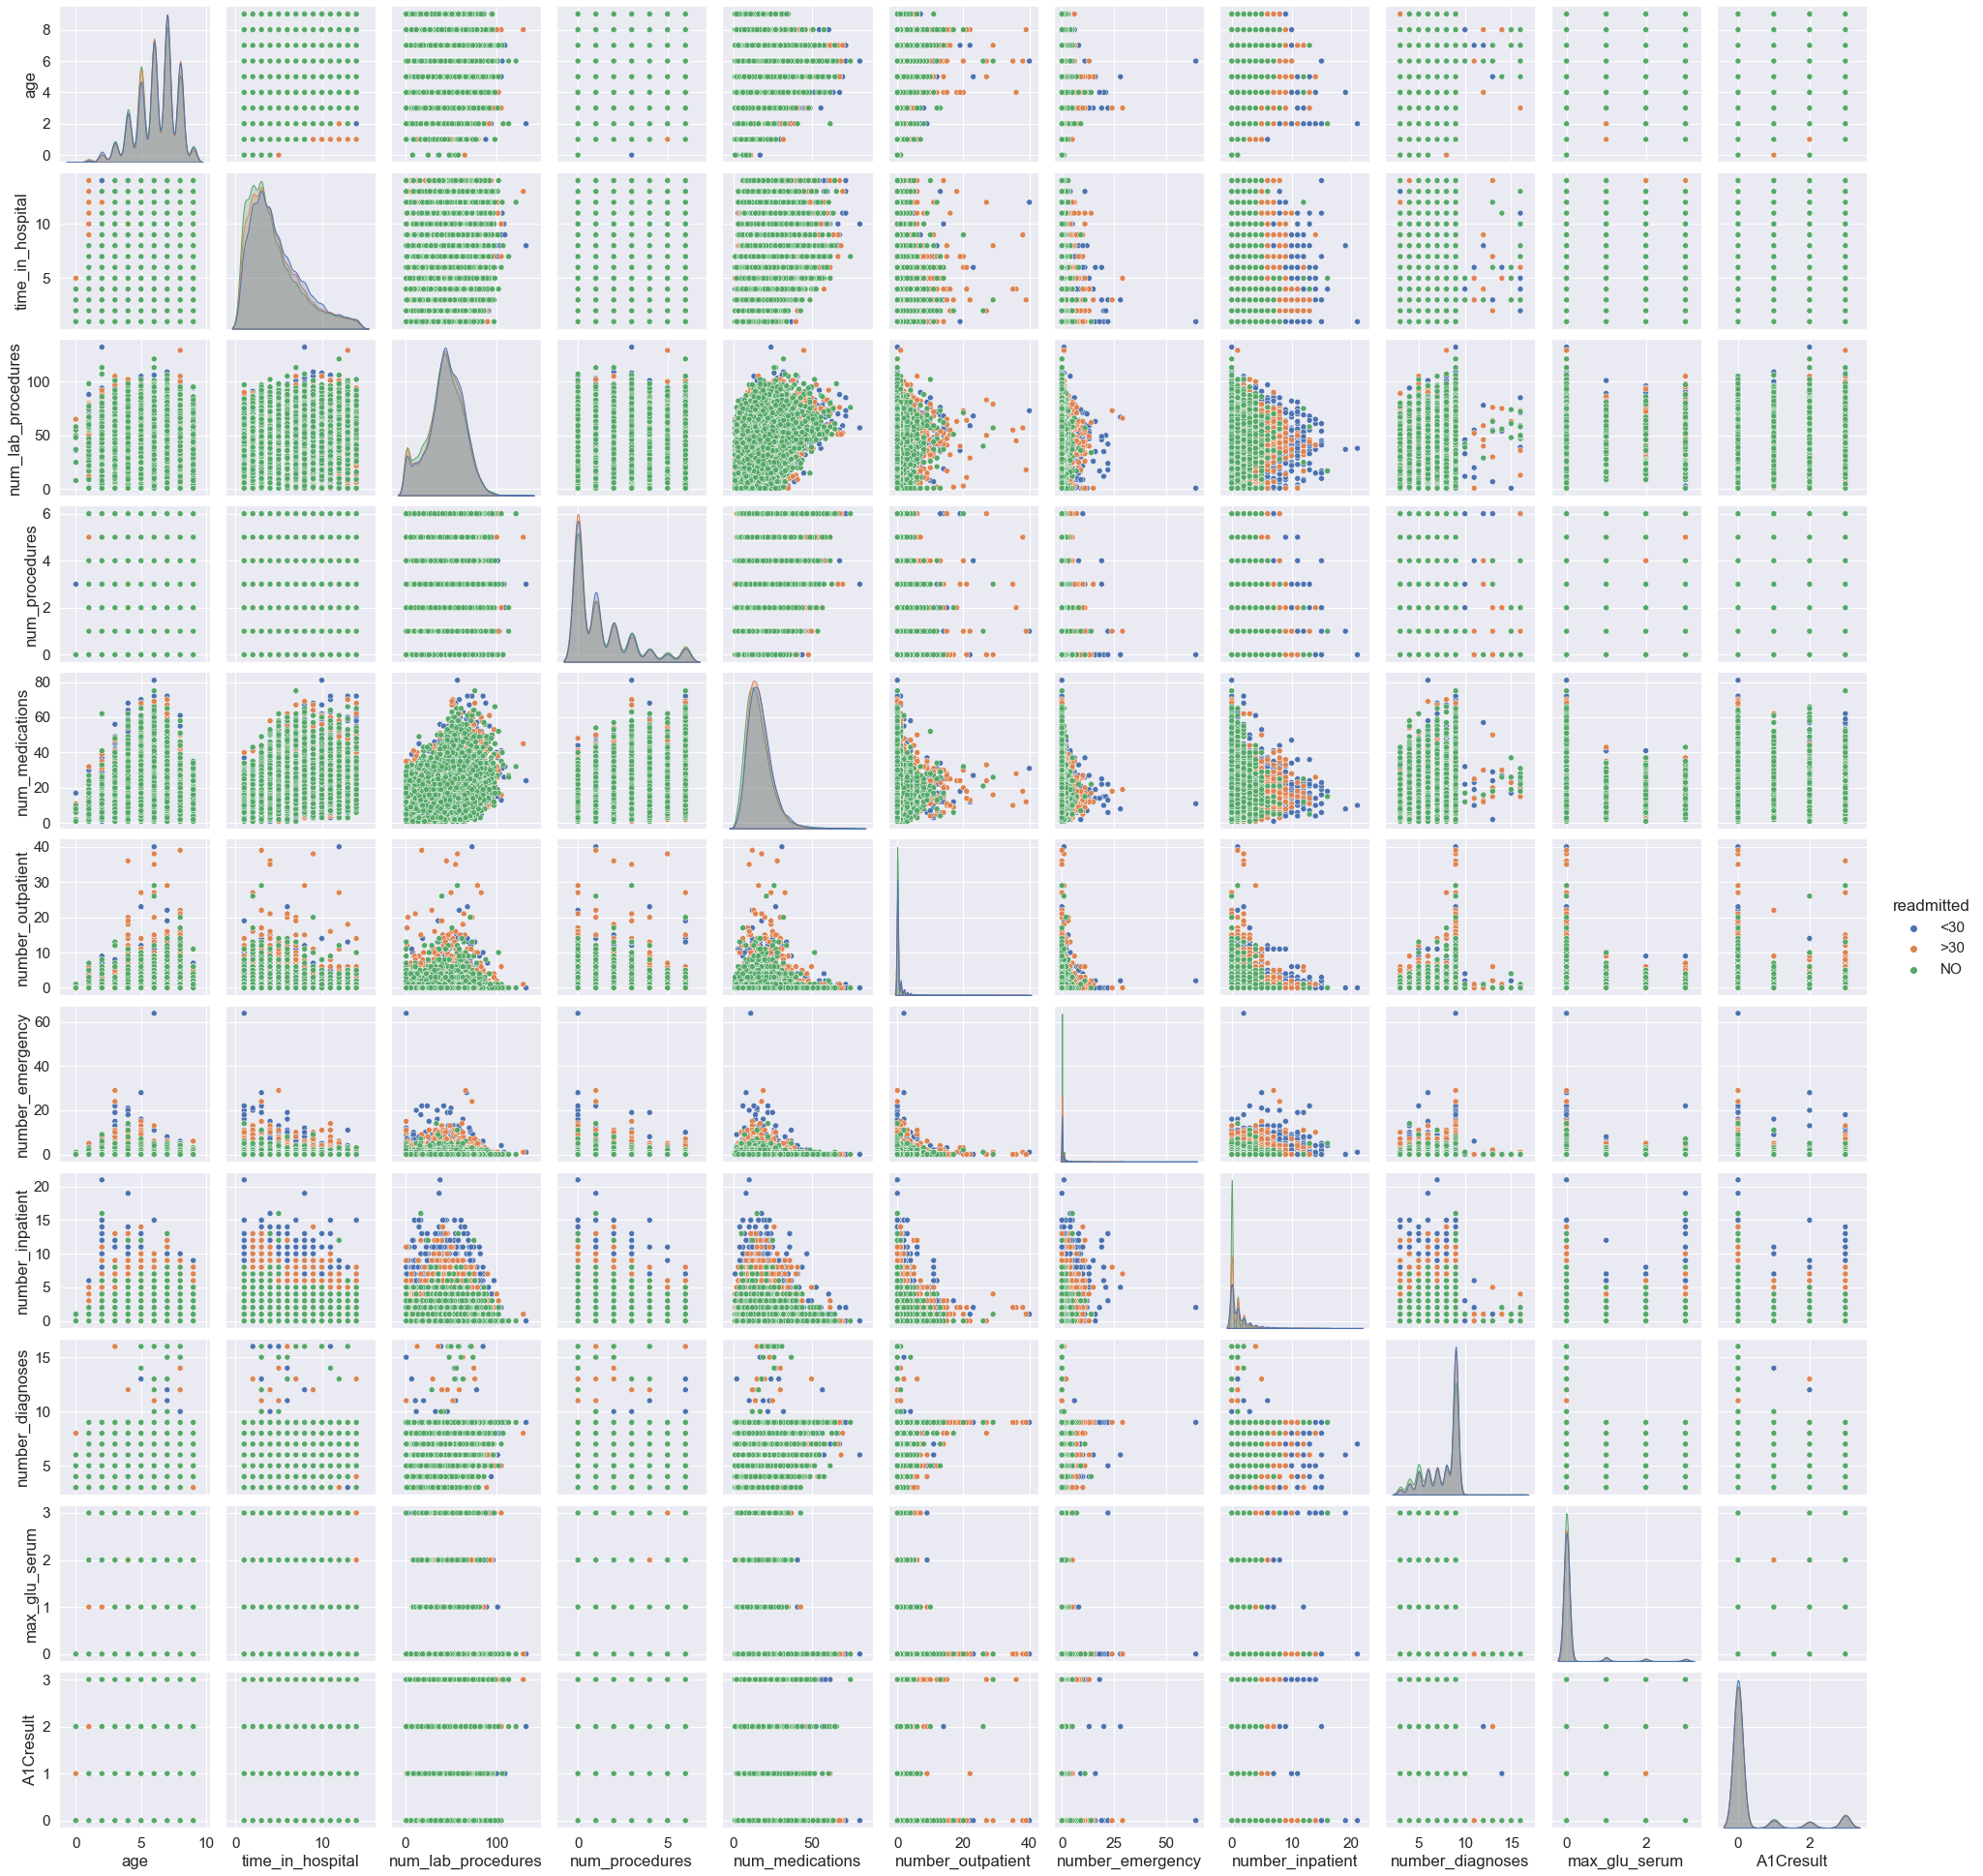

In [2048]:
plot_numericals = ['readmitted','age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses','max_glu_serum','A1Cresult']
p = sns.pairplot(df[plot_numericals], hue="readmitted")

Calculamos tambien la correlacion entre las variables, y ninguna es mayor a .4 por lo que no se hace nada mas para tratar de reducir la correlacón entre variables

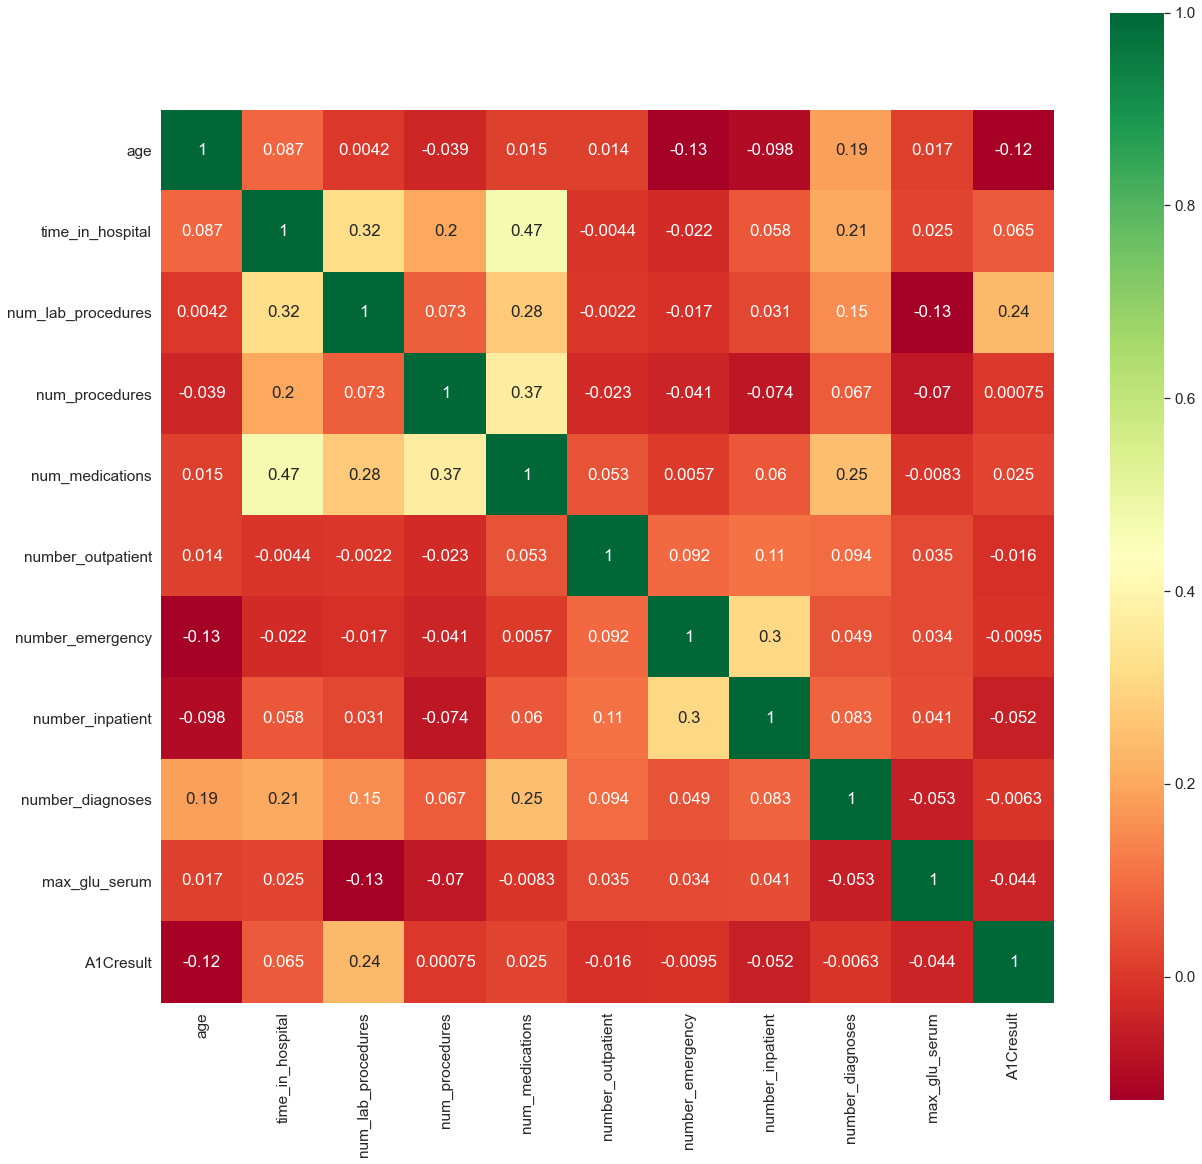

In [2049]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df[plot_numericals].corr(), annot=True,cmap='RdYlGn',square=True)  

Para las variables númeriso, revisaré sidisitribución y ver como normaliarlas, una forma rapida es utilizar log, pero esiten otras. además ya lidias con valores demasiados grandes.

<AxesSubplot:ylabel='Frequency'>

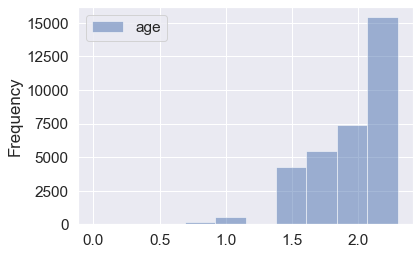

In [2050]:
df['age'] = np.log(df['age']+1)
df['age'].plot.hist(legend='age', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

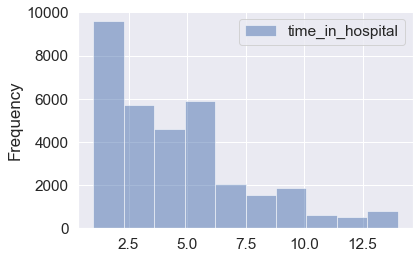

In [2051]:
df['time_in_hospital'].plot.hist(legend='time_in_hospital', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

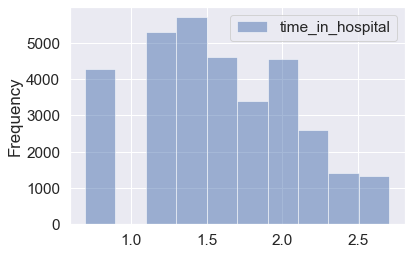

In [2052]:
df['time_in_hospital'] = np.log(df['time_in_hospital']+1)
df['time_in_hospital'].plot.hist(legend='time_in_hospital', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

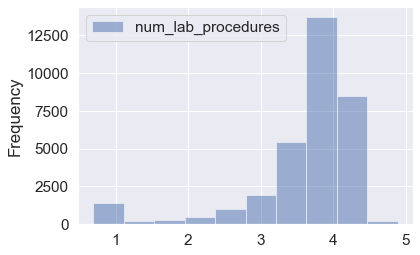

In [2053]:
df['num_lab_procedures'] = np.log(df['num_lab_procedures']+1)
df['num_lab_procedures'].plot.hist(legend='num_lab_procedures', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

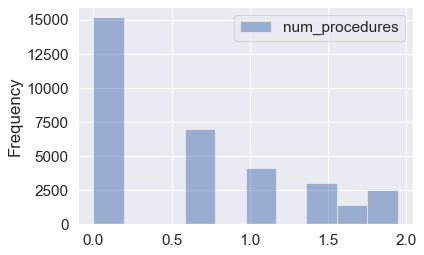

In [2054]:
df['num_procedures'] = np.log(df['num_procedures']+1)
df['num_procedures'].plot.hist(legend='num_procedures', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

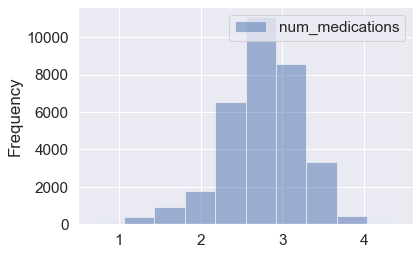

In [2055]:
df['num_medications'] = np.log(df['num_medications']+1)
df['num_medications'].plot.hist(legend='num_medications', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

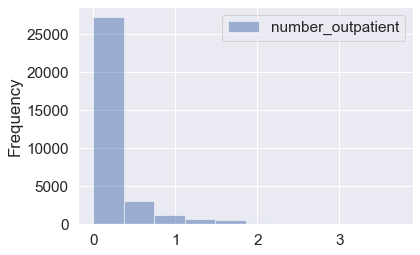

In [2056]:
df['number_outpatient'] = np.log(df['number_outpatient']+1)
df['number_outpatient'].plot.hist(legend='number_outpatient', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

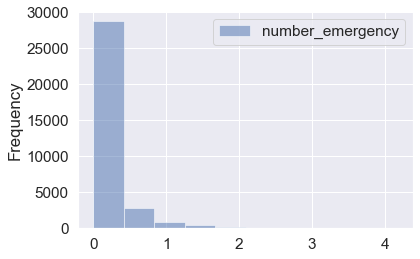

In [2057]:
df['number_emergency'] = np.log(df['number_emergency']+1)
df['number_emergency'].plot.hist(legend='number_emergency', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

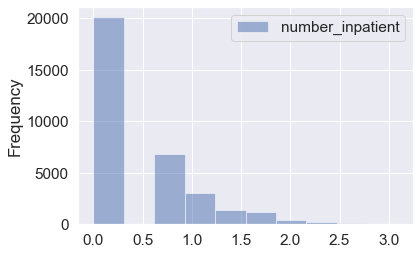

In [2058]:
df['number_inpatient'] = np.log(df['number_inpatient']+1)
df['number_inpatient'].plot.hist(legend='number_inpatient', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

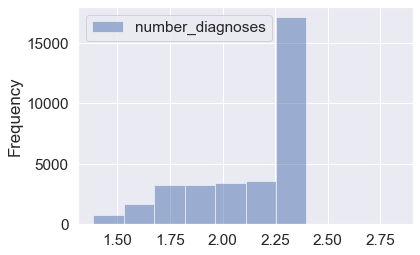

In [2059]:
df['number_diagnoses'] = np.log(df['number_diagnoses']+1)
df['number_diagnoses'].plot.hist(legend='number_diagnoses', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

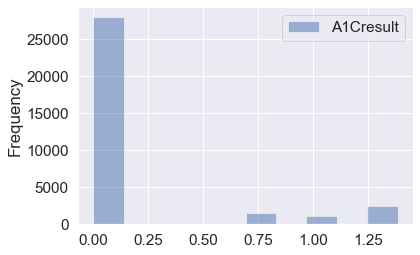

In [2060]:
df['A1Cresult'] = np.log(df['A1Cresult']+1)
df['A1Cresult'].plot.hist(legend='A1Cresult', alpha=0.5)

Solo por seguridad tiramos cualquier nan que se generara al hacer las tranformacioones

In [2061]:
df = df.dropna()

Se convetiran las variables categoricas a dummies.

In [2062]:
for c in new_categorical:
    df[c]=df[c].apply(str)
for c in new_numerical:
    df[c] = pd.to_numeric(df[c])    
dfc = pd.get_dummies(df[new_categorical], drop_first=True)

Se junta los datos numeros y los dumis para tener el conjunto de datos listo para entrenar

In [2063]:
dfsd = pd.concat([df[new_numerical],dfc],axis=1)
dfsd['readmitted'] = df['readmitted']

Separamos en los datos en X y y, tambien sacamos los labels de la class para presentarlos luego

In [2064]:
X = dfsd[dfsd.columns[~dfsd.columns.isin(['readmitted'])]]
y = dfsd[['readmitted']]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(y)
y['readmitted'] = lbl_enc.transform(y)
classes_labels = list(dict(zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_))).keys())

Vamos a selecionar fetures, y reducir el numero de features, al usar XGBClassifier, que nos da la importancia de las features. 

[13:14:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


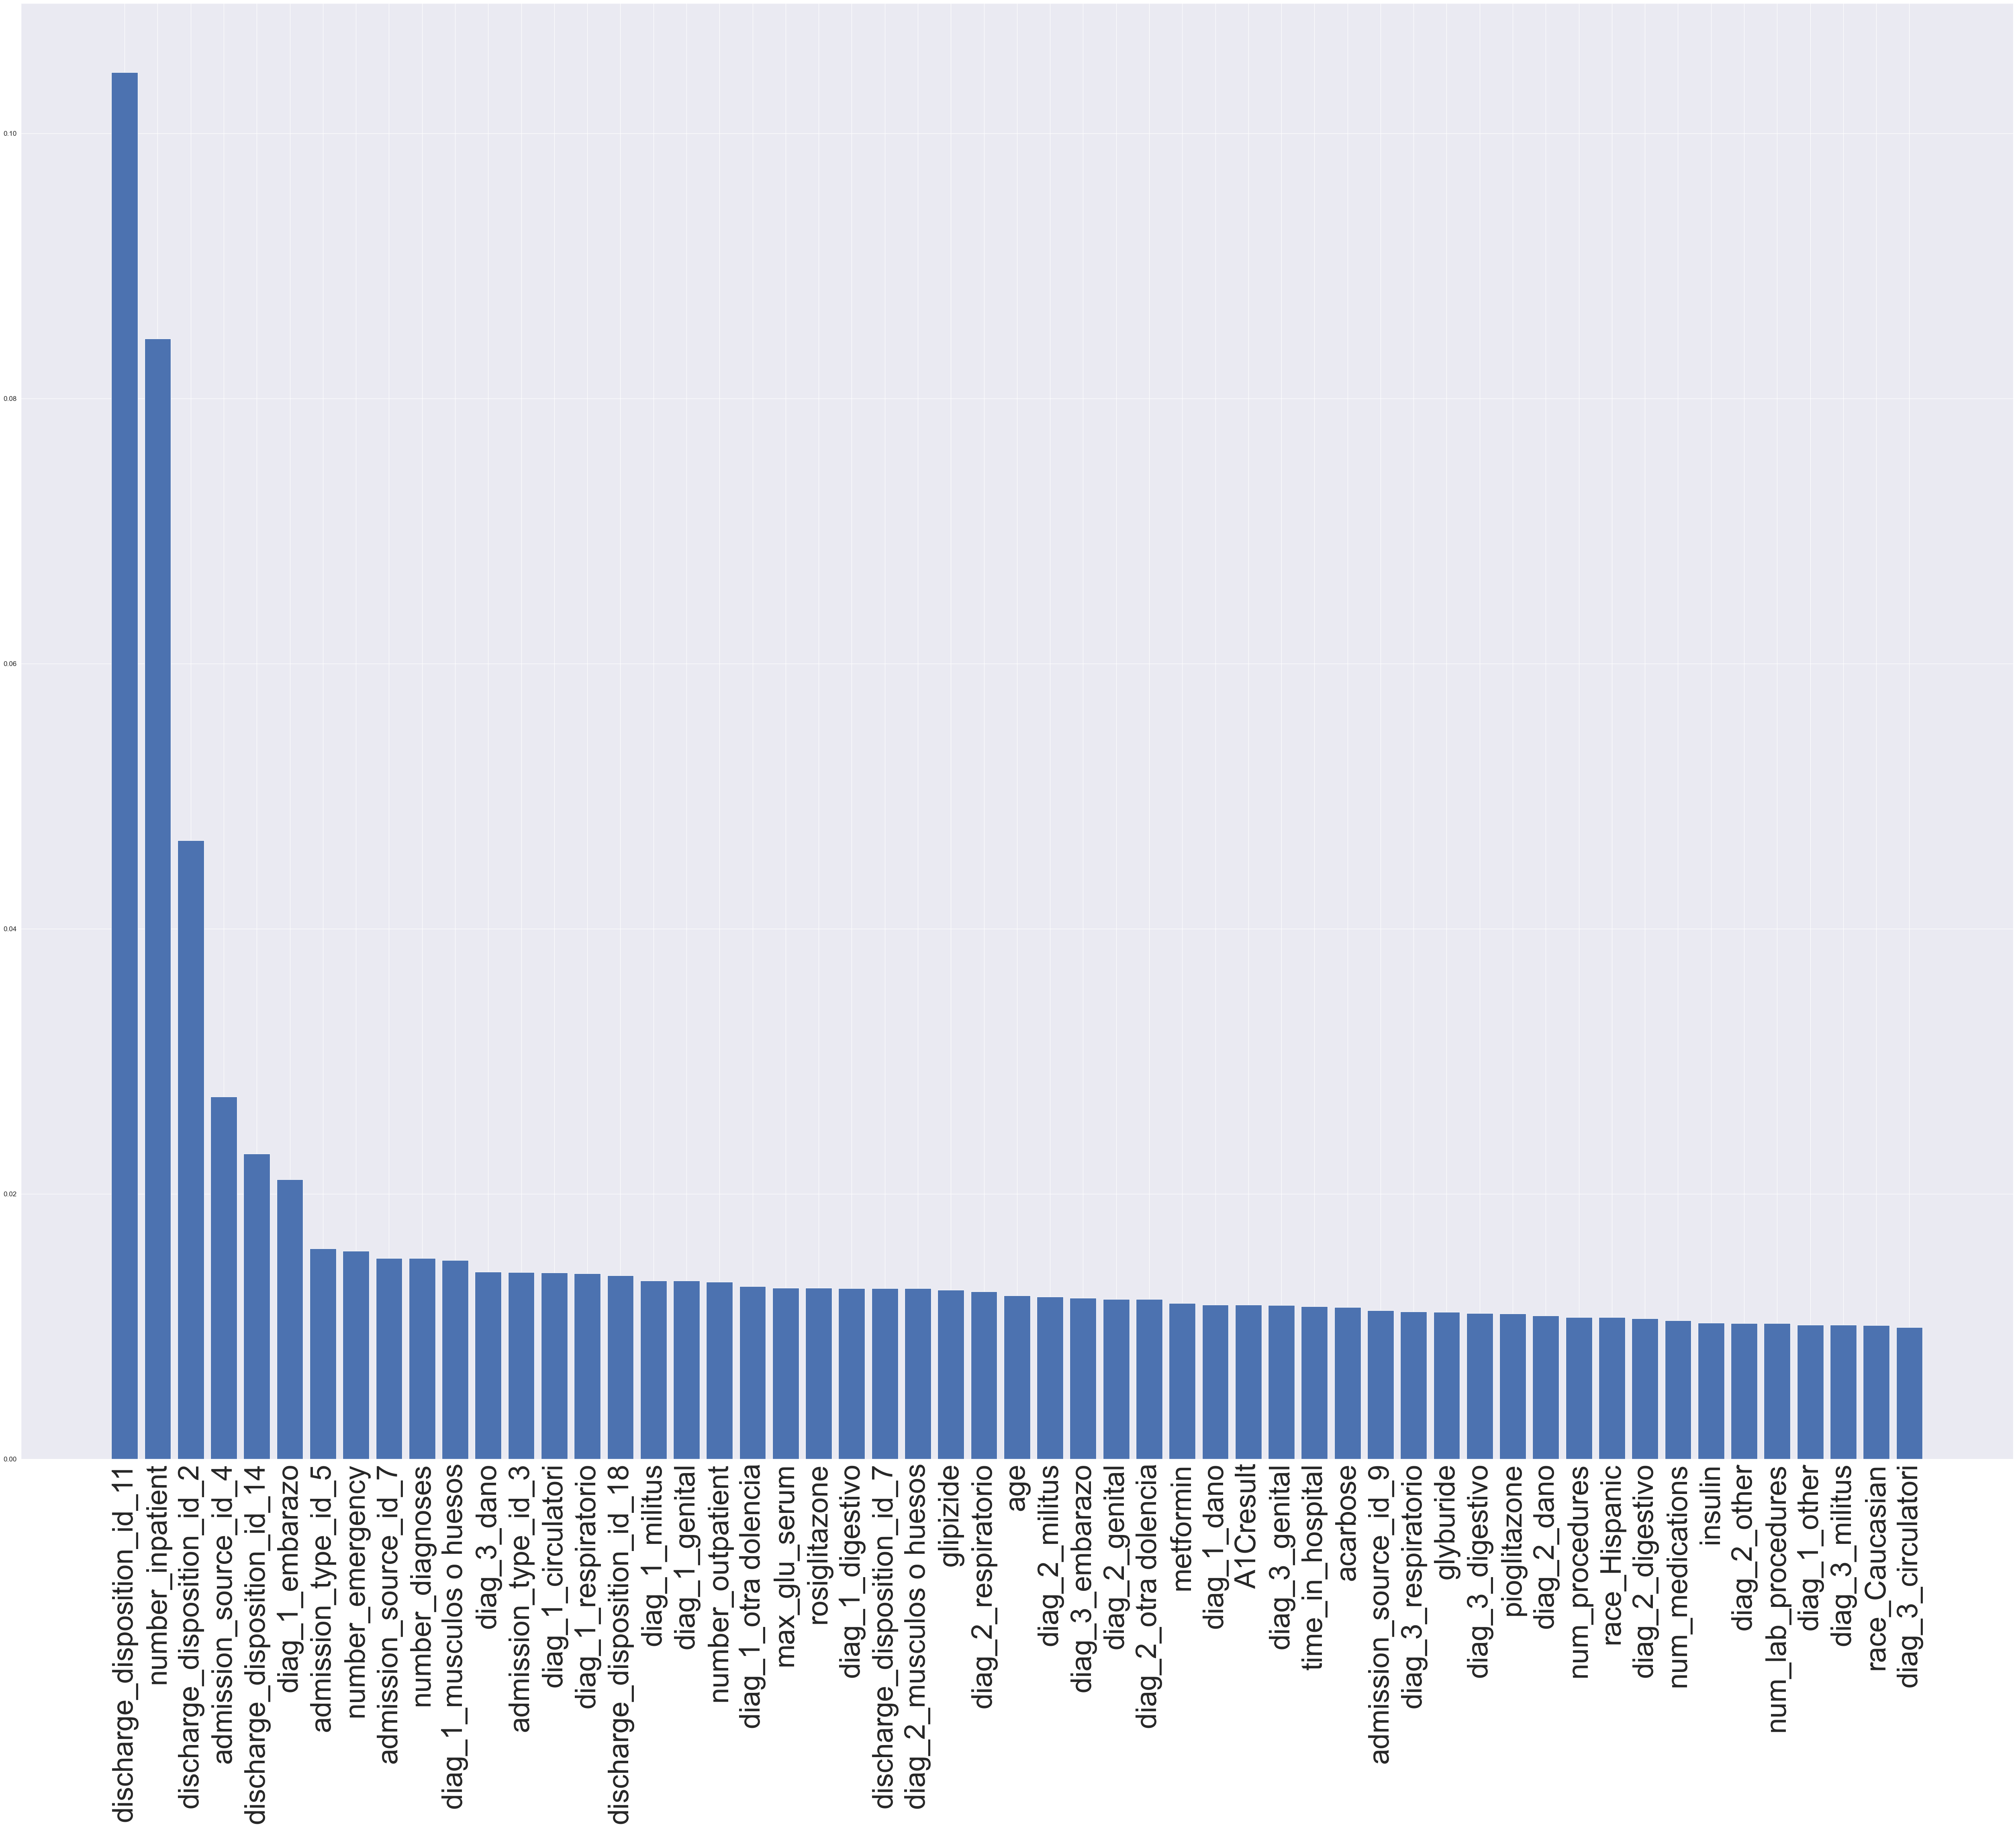

    importance                      feature  abs_importance
31    0.104592  discharge_disposition_id_11        0.104592
7     0.084526             number_inpatient        0.084526
34    0.046665   discharge_disposition_id_2        0.046665
36    0.027324        admission_source_id_4        0.027324
32    0.023033  discharge_disposition_id_14        0.023033
42    0.021091              diag_1_embarazo        0.021091
30    0.015872          admission_type_id_5        0.015872
6     0.015704             number_emergency        0.015704
37    0.015152        admission_source_id_7        0.015152
8     0.015145             number_diagnoses        0.015145
45    0.015003     diag_1_musculos o huesos        0.015003
60    0.014111                  diag_3_dano        0.014111
28    0.014075          admission_type_id_3        0.014075
39    0.014060           diag_1_circulatori        0.014060
48    0.013998          diag_1_respiratorio        0.013998
33    0.013859  discharge_disposition_id

In [2065]:
random.seed(1)
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define the model
clf =  XGBClassifier(learning_rate=0.1,max_depth=8,min_child_weight=10)
clf.fit(X,y)
topfeatures = plot_importance(clf.feature_importances_, X.columns, int(len(X.columns)*0.8))

Se selecionan las features mas importantes

In [2066]:
X = X[X.columns[X.columns.isin( topfeatures['feature'].values.tolist() )]]

ahora vamos a crear los conjuntos de datos de entrenamiento y validacion

In [2072]:
Xt, Xv, yt, yv = train_test_split(X, y, test_size = 0.1, random_state = 111)

usaremos tambien singular value decomposition, para reducir la dimmension y quedanros con las combinaciones mas imporantes. tambien se standarizan los datos.

In [2074]:
svd = decomposition.TruncatedSVD(n_components=50)
svd.fit(Xt)
xtrain_svd = svd.transform(Xt)
xvalid_svd = svd.transform(Xt)
scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl = scl.transform(xtrain_svd)
xvalid_svd_scl = scl.transform(xvalid_svd)

Usaremos un cross validation para ver el desempeño del modelo.

In [2075]:
clf =  XGBClassifier(learning_rate=0.1,max_depth=6,min_child_weight=1)
scores = cross_val_score(clf, xtrain_svd_scl, y_train, cv=10)

[13:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

Entrenamos el model de clasificación

In [2076]:
clf = XGBClassifier(learning_rate=0.1,max_depth=8,min_child_weight=10)
clf.fit(xtrain_svd_scl, y_train) 

[13:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

probamos con el dato de validacón

              precision    recall  f1-score   support

         <30       0.72      0.77      0.74      9264
         >30       0.74      0.77      0.76      9611
          NO       0.79      0.72      0.75     10992

    accuracy                           0.75     29867
   macro avg       0.75      0.75      0.75     29867
weighted avg       0.75      0.75      0.75     29867



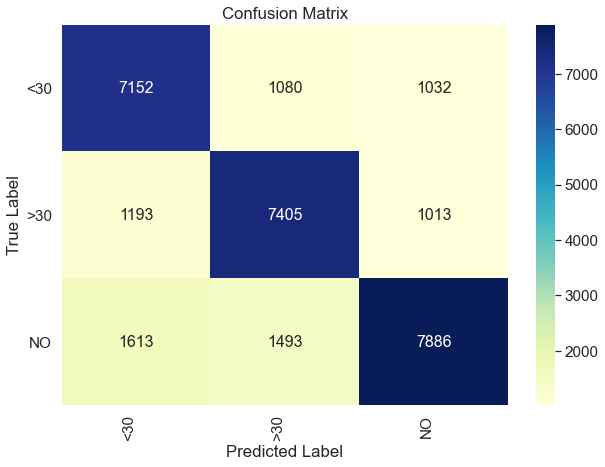

In [2077]:
multiclass_Model_Summary(multiclass_to_class(clf.predict_proba(xvalid_svd_scl)),yt, classes_labels)

## SE OBTIENE UN F1 SCORE  DE 0.75